In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
game = files.upload()

Saving Gaming_data.csv to Gaming_data.csv


In [4]:
game = pd.read_csv("Gaming_data.csv")
game

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [5]:
game.shape

(10, 2)

In [6]:
game.columns

Index(['Steps', 'Points'], dtype='object')

In [7]:
game.head()

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [8]:
game.tail()

,Steps,Points
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [9]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Steps   10 non-null     int64
 1   Points  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [11]:
game.duplicated().sum()

0

In [12]:
game.isnull().sum()

Steps     0
Points    0
dtype: int64

In [13]:
game.describe()

,Steps,Points
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


,Steps,Points
Steps,1.000000,0.817949
Points,0.817949,1.000000


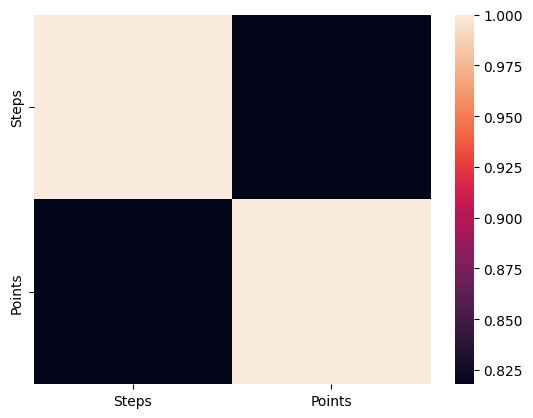

In [15]:
sns.heatmap(game.corr())
game.corr()

In [20]:
x = game.drop(['Points'],axis = 1).values
y = game['Points'].values

In [21]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [22]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [23]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
sr.fit_transform(x)

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=47)

In [27]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = le.predict(x_test)
y_pred

array([ 58797.10144928, -25594.20289855, 227579.71014493, 311971.01449275])

In [31]:
y_test

array([ 60000,  50000, 110000, 150000])

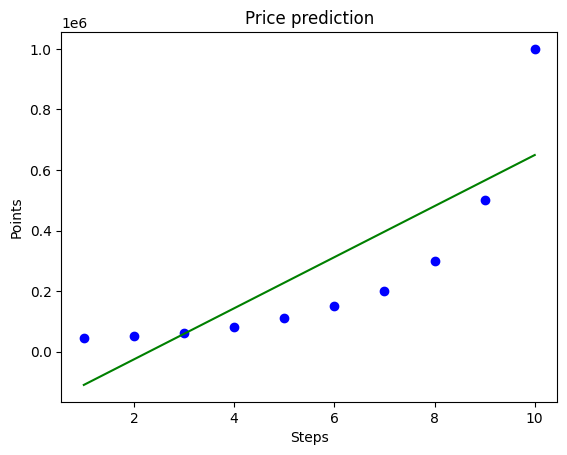

In [32]:
plt.scatter(x,y,color ="blue")
plt.plot(x,le.predict(x),color = "green")
plt.title("Price prediction")
plt.xlabel("Steps")
plt.ylabel("Points")
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=5)
x_poly = pol.fit_transform(x)
reg = LinearRegression()
reg.fit(x_poly,y)


LinearRegression()

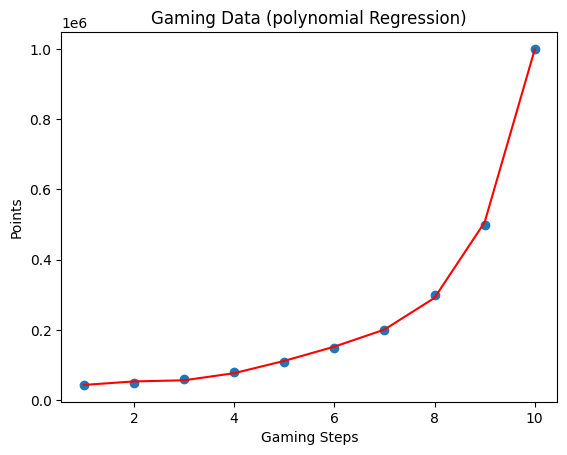

In [41]:
plt.scatter(x,y)
plt.plot(x, reg.predict(pol.fit_transform(x)),color='red')
plt.title('Gaming Data (polynomial Regression)')
plt.xlabel('Gaming Steps')
plt.ylabel('Points')
plt.show()